<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Regressione_Lineare_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT GENERAL LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

# IMPORT DATA FROM EXTERNAL SOURCE

In [100]:

path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Lineare_Multipla_IN.csv'
INPUT_df=pd.read_csv(path)
s_theta = np.zeros((INPUT_df.shape[1], 1))


#remove all NaN
# 0 -> rows
# 1 -> columns
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')

print(INPUT_df.shape)
#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0:2]
np_IN_y=np_IN[:,2]
print('Dimensione features vectors',np_IN_X.shape,'\nDimensione output',np_IN_y.shape)
INPUT_df.head()


(104, 3)
Dimensione features vectors (104, 2) 
Dimensione output (104,)


,Superficie [mq],Vani,Prezzo [euro]
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


# LIBRARIES FOR MACHINE LEARNING

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# DATA PRE-PROCESSING

In [0]:
# split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)


#con più features conviene che queste siano comprese 
#in un range di valori comune, per far questo abbiamo due possibilità:
#Normalizzazione: portiamo tutti i dati in un range compreso tra 0 e 1
#Standardizzazione: convertiamo i dati in una distribuzione normale 
#con media 0 e deviazione standard 1.

#stardadize
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
X_all=ss.transform(np_IN_X)


# TRAINING PHASE

In [104]:

#train the linear regressor
linear_reg = LinearRegression().fit(X_train_ss, y_train)

print ('Coefficienti stiamati: ',linear_reg.coef_)
print ('Intercept: ',linear_reg.intercept_)

Coefficienti stiamati:  [136161.36819136  41422.20895612]
Intercept:  271827.6923076923


# TEST PHASE

In [0]:
#y_pred_dataset is a linear prediction of X_dataset
y_pred_test=linear_reg.predict(X_test_ss)
y_pred_train=linear_reg.predict(X_train_ss)
y_pred_all=linear_reg.predict(X_all)

**Compute metrics evaluation and plot results**

In [106]:
R2_test=linear_reg.score(X_test_ss,y_test)
MSE_test = mean_squared_error( y_test,y_pred_test)
R2_train=linear_reg.score(X_train_ss,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2_test,'\nMSE= %f \n' % MSE_test)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

TEST
R^2= 0.720189101819543 
MSE= 1215200635.729930 

TRAIN
R^2= 0.8113166675752361 
MSE= 2805502349.579242 



**SCALE BACK**

In [0]:
#inverse_trasform->Scale back the data to the original representation
X_train_new=ss.inverse_transform(X_train_ss)
X_test_new=ss.inverse_transform(X_test_ss)
np_IN_X_new=ss.inverse_transform(X_all)

# PLOT RESULTS

Dimensione features vectors (26, 2) 
Dimensione output (26,)
(36,)


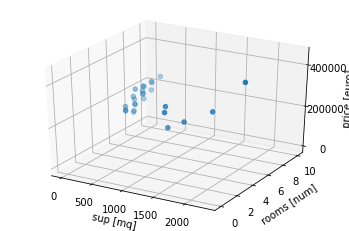

In [119]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

print('Dimensione features vectors',X_test_ss.shape,'\nDimensione output',y_test.shape)

fig = plt.figure() 
axs = fig.add_subplot(111, projection='3d') 

axs.locator_params(axis='z', nbins=4)
axs.set_xlabel('sup [mq]')
axs.set_ylabel('rooms [num]')
axs.set_zlabel('price [euro]')
#axs.scatter(X_test_new[:,0],X_test_new[:,1],y_test)
#axs.scatter(X_train_new[:,0],X_train_new[:,1],y_train,color='red')
#axs.scatter(np_IN_X_new[:,0],np_IN_X_new[:,1],y_pred_all,color='green')


x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
print(np.ravel(xp).shape)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

axs.scatter(X_test_new[:,0],X_test_new[:,1],y_test)
axs.plot_surface(xp, yp, zp, alpha=0.7)
#fig.show()